In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [ ]:
import re
import pandas as pd
import numpy as np
import base64
import base64
import neurokit2 as nk

In [11]:
sampling_rate_hz = 128
time_division = 10 #in minutes

In [ ]:
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

In [ ]:
def stringToDataFrame(strList, sep=';'):
  result = list(strList.split(sep))
  # print(result)
  return pd.DataFrame(result).T

In [8]:
# Download example data
#data = nk.data("bio_eventrelated_100hz")
# Get data
onedrive_url = 'https://1drv.ms/t/s!Am-4mS5QxOmCg9tAJUoZ-DG0iIyKmg?e=JEeQAs'
direct_download_url = create_onedrive_directdownload(onedrive_url)
print(direct_download_url)
# data = pd.read_table(direct_download_url, delimiter=';')
data = pd.read_csv(direct_download_url, header=None, names=['Column1'])
data2 = stringToDataFrame(strList=data.Column1.str, sep=';')
data2.columns = ['Column1']
data2.shape

# Preprocess the data (filter, find peaks, etc.)
#processed_data, info = nk.bio_process(ecg=data["ECG"], sampling_rate=500)

# Compute relevant features
#results = nk.bio_analyze(processed_data, sampling_rate=500)



https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3QvcyFBbS00bVM1UXhPbUNnOXRBSlVvWi1ERzBpSXlLbWc_ZT1KRWVRQXM/root/content


(1843202, 1)

In [9]:
data2 = data2.apply (pd.to_numeric, errors='coerce')
data2 = data2.dropna()
data2 = data2.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/neurokit2/signal/signal_fixpeaks.py:236: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
/usr/local/lib/python3.7/dist-packages/neurokit2/signal/signal_fixpeaks.py:236: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2


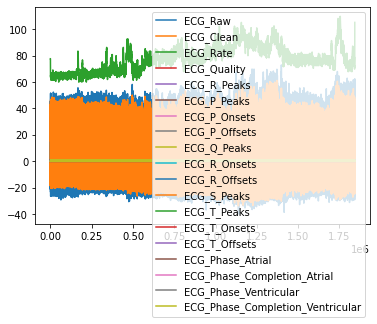

In [10]:
# Process the signal
#df, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)
df, info = nk.ecg_process(data2['Column1'], sampling_rate=sampling_rate_hz)
# Visualize
df.plot()

In [12]:
qtd = data2.size // (time_division * 60 * sampling_rate_hz) # 10 minutos * 60 segundos * sampling rate (Hz)


In [20]:
analyze_df = pd.DataFrame()
for x in range(0,qtd):
  print(f"Intervalo de {x*76800} até {(x+1)*76800}")
  analyze = nk.ecg_analyze(df.iloc[(x*76800):(x+1)*76800], sampling_rate=sampling_rate_hz)
  analyze_df = analyze_df.append(analyze, ignore_index=True)

Intervalo de 0 até 76800
Intervalo de 76800 até 153600
Intervalo de 153600 até 230400
Intervalo de 230400 até 307200
Intervalo de 307200 até 384000
Intervalo de 384000 até 460800
Intervalo de 460800 até 537600
Intervalo de 537600 até 614400
Intervalo de 614400 até 691200
Intervalo de 691200 até 768000
Intervalo de 768000 até 844800
Intervalo de 844800 até 921600
Intervalo de 921600 até 998400
Intervalo de 998400 até 1075200
Intervalo de 1075200 até 1152000
Intervalo de 1152000 até 1228800
Intervalo de 1228800 até 1305600
Intervalo de 1305600 até 1382400
Intervalo de 1382400 até 1459200
Intervalo de 1459200 até 1536000
Intervalo de 1536000 até 1612800
Intervalo de 1612800 até 1689600
Intervalo de 1689600 até 1766400
Intervalo de 1766400 até 1843200


In [21]:
analyze_df

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,64.541859,929.954387,23.197826,5.288272,22.654366,3.923469,22.960823,NaN,NaN,10.712669,...,1.516552,3.580976,0.857820,1.370478,1.520495,1.483854,1.395939,1.925110,2.672061,0.521604
1,65.038997,922.513001,19.686573,5.239919,19.016678,3.862614,19.415402,NaN,NaN,9.434490,...,1.444988,3.346299,0.914744,1.126462,1.297115,1.231894,1.449617,1.948849,2.703470,0.475021
2,66.360898,904.152526,48.153943,27.124615,37.670067,21.205633,41.985132,NaN,NaN,12.600205,...,0.619023,4.490196,0.536129,0.939361,1.384310,1.733026,0.979066,1.737219,2.055191,0.409974
3,66.365340,904.070041,22.870830,8.859428,21.322522,8.451011,21.679429,NaN,NaN,10.726754,...,1.650837,3.552136,0.900246,1.213559,1.404006,1.400334,1.517057,1.943752,3.191587,0.523071
4,69.054824,868.888335,48.679228,27.375606,37.594169,18.870006,43.410671,NaN,NaN,14.346297,...,0.763056,4.484979,0.608340,0.931223,1.442007,1.584250,1.024360,1.791883,2.269614,0.465260
5,69.570092,862.533723,42.693486,22.742234,33.999528,13.488663,39.882559,NaN,NaN,16.807304,...,0.853827,4.298356,0.731989,1.063934,1.488469,1.869629,1.082105,1.867046,2.654217,0.638447
6,74.041237,810.449087,86.859826,82.997560,33.557208,85.945534,37.213524,NaN,NaN,16.081472,...,0.479712,5.049496,0.410062,0.663788,0.910846,0.861783,0.984202,1.771703,2.248647,0.167635
7,74.524637,804.960151,47.871675,42.363238,26.055008,43.455514,28.754003,NaN,NaN,10.868880,...,0.573313,4.558977,0.497563,0.972359,1.042158,1.076474,1.051679,1.751505,1.938969,0.307364
8,78.036679,768.854300,28.374963,16.243909,23.401862,12.485285,25.745622,NaN,NaN,10.702289,...,1.536043,3.866257,0.745247,1.361485,1.406157,1.586169,1.450294,1.848218,2.835353,0.456229
9,79.511908,754.654046,29.933175,17.296555,24.702055,14.693955,26.608437,NaN,NaN,12.341738,...,1.649326,3.946698,0.809689,1.274592,1.391852,1.401733,1.353055,1.915368,2.675358,0.521686
